['A' 'B' 'C']
Mean Squared Error: 7361111111.111106
Root Mean Squared Error: 85796.9178415583
R-squared: -1.4334251606978863


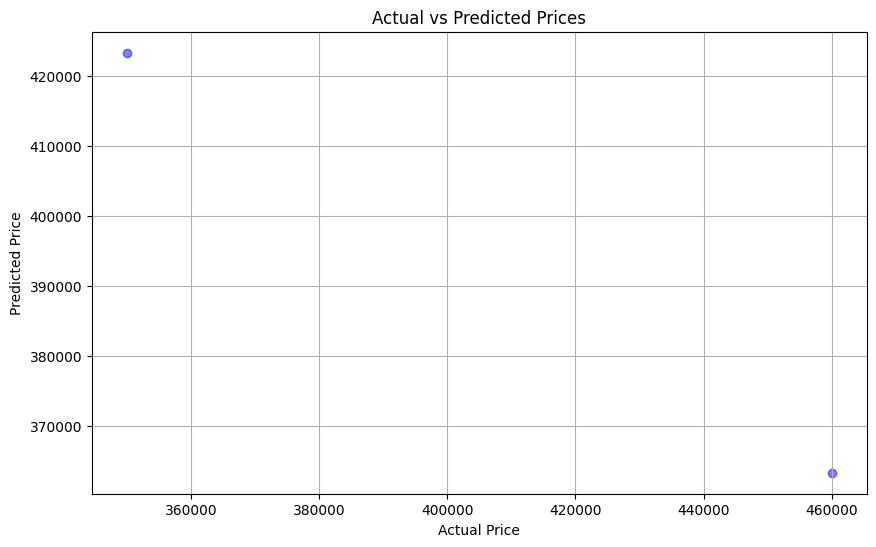

Predicted price for the new house: $385555.55555555556


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual dataset filename)
df = pd.read_csv('house_price.csv')

# Check the unique values in each column of X_train
print(df['location'].unique())  # Check for non-numeric values

# Define features and target variables based on actual column names
features = df[['size', 'number_of_bedrooms', 'location', 'year_built']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical variables (like 'location')
categorical_features = ['location']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Append regression model to preprocessing pipeline
regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

# Fit the model
regression_pipeline.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = regression_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# Example of predicting price for a new house
new_house_data = pd.DataFrame({
    'size': [2000],
    'number_of_bedrooms': [4],
    'location': ['Suburb'],  # Assuming 'Suburb' is a valid location in your dataset
    'year_built': [2010]
})

predicted_price = regression_pipeline.predict(new_house_data)
print(f'Predicted price for the new house: ${predicted_price[0]}')
